In [83]:
import pandas as pd
import numpy as np 
import sidetable 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None 
df = pd.read_csv('./datos/HU2.csv', index_col = 0)
df.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
0,0,India,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,No (we do not use ML methods),NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,NaN,"Colab Notebooks,","General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...","Google Cloud Platform (GCP) ,","Google Cloud Compute Engine ,","Google Cloud Storage (GCS) ,","No / None,","No / None,",NaN,"No / None,","GitHub , Kaggle ,","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...","Email newsletters (Data Elixir, O'Reilly Data ..."
1,1,Indonesia,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,"Kaggle Notebooks,Colab Notebooks,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kaggle Learn Courses,Cloud-certification progr...","Journal Publications (peer-reviewed journals, ..."
2,2,Pakistan,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,I do not know,MySQL,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,NaN,NaN,None of these activities are an important par...,NaN,"Kaggle Notebooks,",NaN,NaN,"None,",NaN,NaN,"DataRobot,","No / None,",NaN,"No / None,","I do not share my work publicly,","DataCamp,","Kaggle (notebooks, forums, etc),YouTube (Kaggl..."
3,3,Mexico,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,I do not know,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN,"Colab Notebooks,","General purpose image/video tools (PIL, cv2, s...","None,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera,edX,","YouTube (Kaggle YouTube, Cloud AI Adventures, ..."
4,4,India,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,We use ML methods for generating insights (but...,NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,"Google Cloud Datalab,",NaN,NaN,"Microsoft Azure ,","Microsoft Azure Virtual Machines ,","Microsoft Azure Data Lake Storage ,","Azure Machine Learning Studio ,","No / None,",NaN,"Weights & Biases ,","I do not share my work publicly,","Kaggle Learn Courses,Udemy,","Journal Publications (peer-reviewed journals, ..."


In [96]:
df['q6'].unique()

array(['5-10 years', '20+ years', '1-3 years', '< 1 years', '3-5 years',
       '10-20 years', 'I have never written code'], dtype=object)

In [61]:
df_q10=df['q10'].reset_index()
df_q10

,index,q10
0,0,"Colab Notebooks,"
1,1,"Kaggle Notebooks,Colab Notebooks,"
2,2,"Kaggle Notebooks,"
3,3,"Colab Notebooks,"
4,4,"Google Cloud Datalab,"
...,...,...
25968,25968,"Colab Notebooks, Amazon Sagemaker Studio Noteb..."
25969,25969,"None,"
25970,25970,NaN
25971,25971,"None,"


In [62]:

def quitar_comillas (col):
        try:
            return col.split(',')
        except:
            np.nan

In [63]:
df_q10['q10'] = df_q10['q10'].apply(quitar_comillas)

In [68]:
df_10_explode = df_q10['q10'].explode().reset_index()

In [69]:
df_10_explode

,index,q10
0,0,Colab Notebooks
1,0,
2,1,Kaggle Notebooks
3,1,Colab Notebooks
4,1,
...,...,...
62918,25969,
62919,25970,None
62920,25971,None
62921,25971,


In [74]:
df_10_explode['q10'].unique()

array(['Colab Notebooks', '', ' Kaggle Notebooks', 'Google Cloud Datalab',
       'Google Cloud Notebooks (AI Platform / Vertex AI) ', 'None',
       ' Databricks Collaborative Notebooks ', ' Binder / JupyterHub ',
       'Other', ' IBM Watson Studio ', ' Zeppelin / Zepl Notebooks ',
       ' Observable Notebooks ', 'Azure Notebooks',
       ' Amazon Sagemaker Studio Notebooks ', ' Paperspace / Gradient ',
       ' Amazon EMR Notebooks ', None, ' Code Ocean ',
       ' Deepnote Notebooks '], dtype=object)

In [78]:
gb = df_10_explode.groupby('q10').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [80]:
df_q10 = gb.reset_index(name='count')

In [94]:
df_q10.drop(0, axis= 0,inplace=True)

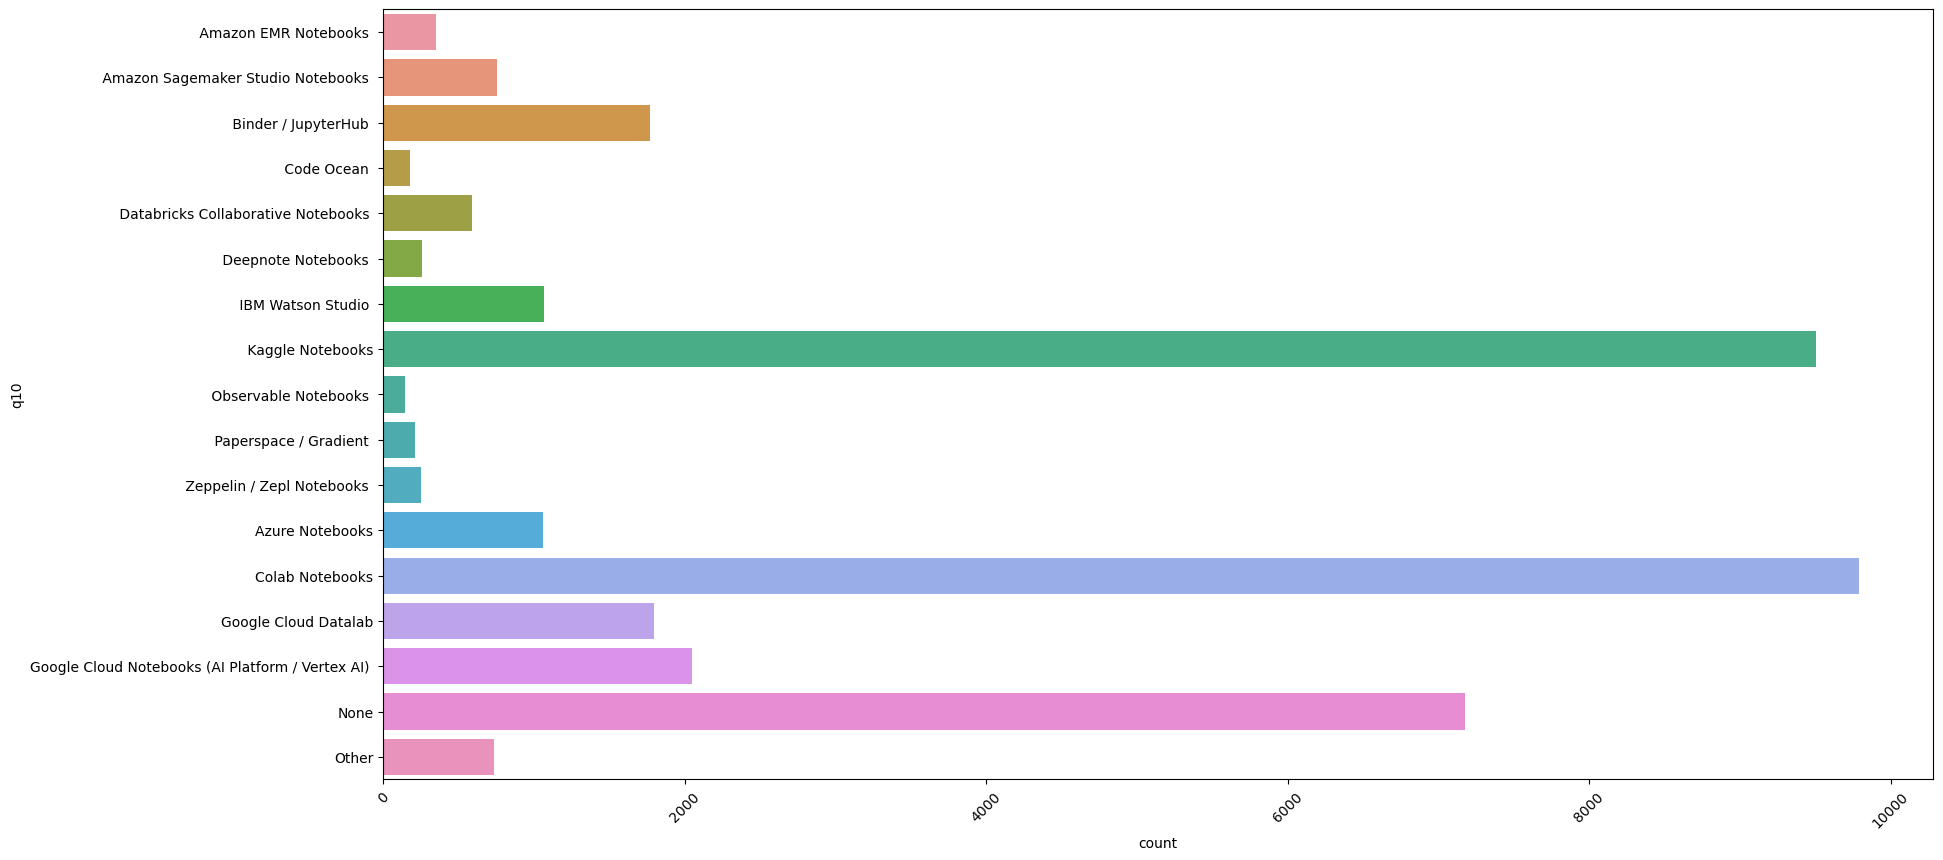

In [95]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q10', data=df_q10)
plt.xticks(rotation = 45);

In [ ]:
df_q18 = df['q18'].reset_index()
df_q18

,index,q18
0,0,"General purpose image/video tools (PIL, cv2, s..."
1,1,NaN
2,2,NaN
3,3,"General purpose image/video tools (PIL, cv2, s..."
4,4,NaN
...,...,...
25968,25968,"General purpose image/video tools (PIL, cv2, s..."
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [ ]:
df_q18['q18'] = df_q18['q18'].apply(quitar_comillas)

In [ ]:
df_18_explode = df_q18['q18'].explode().reset_index()

In [ ]:
df_18_explode

,index,q18
0,0,General purpose image/video tools (PIL
1,0,cv2
2,0,skimage
3,0,etc)
4,0,
...,...,...
89510,25968,
89511,25969,None
89512,25970,None
89513,25971,None


In [ ]:
df_18_explode['q18'].unique()

array(['General purpose image/video tools (PIL', ' cv2', ' skimage',
       ' etc)', '', None, 'Image segmentation methods (U-Net',
       ' Mask R-CNN', 'Object detection methods (YOLOv3', ' RetinaNet',
       'Image classification and other general purpose networks (VGG',
       ' Inception', ' ResNet', ' ResNeXt', ' NASNet', ' EfficientNet',
       'Generative Networks (GAN', ' VAE', 'None', 'Other'], dtype=object)

In [ ]:
gb_18 = df_18_explode.groupby('q18').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [ ]:
df_q18 = gb_18.reset_index(name ='count')

In [ ]:
df_q18.drop(0, axis = 0,inplace = True)

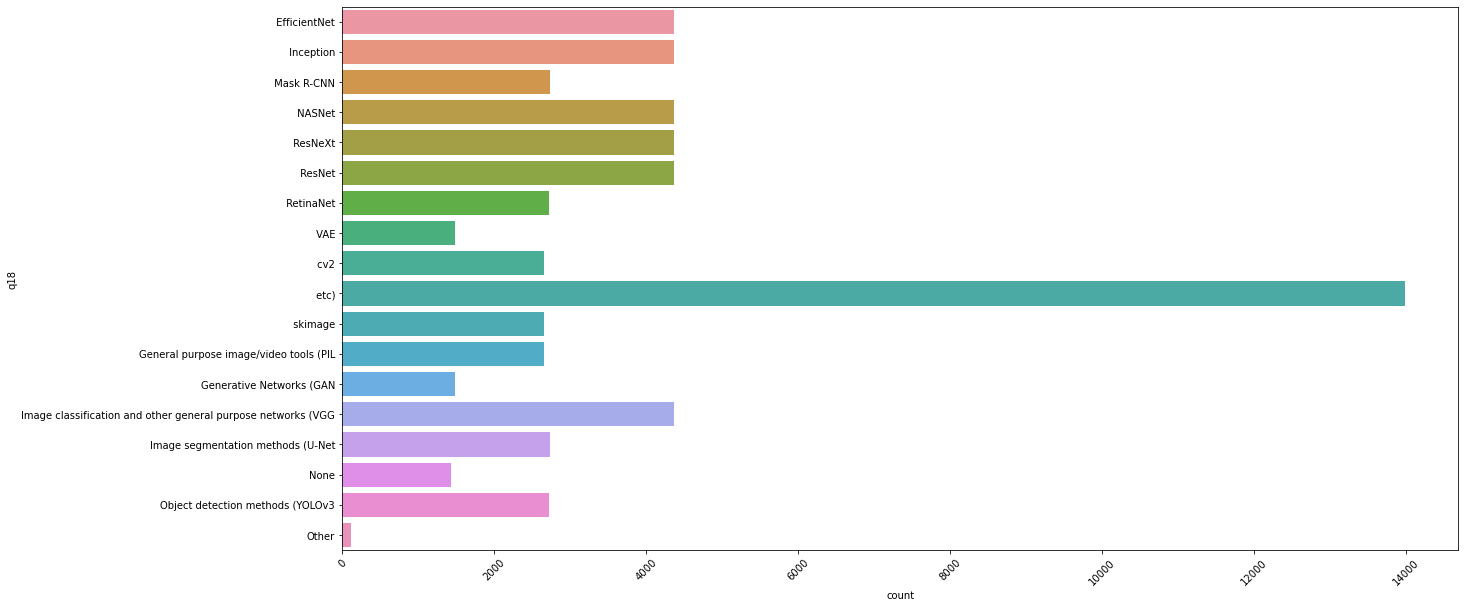

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x ='count', y = 'q18', data = df_q18)
plt.xticks(rotation = 45);

In [ ]:
#q19

df_q19 = df['q19'].reset_index()
df_q19

,index,q19
0,0,"Word embeddings/vectors (GLoVe, fastText, word..."
1,1,NaN
2,2,NaN
3,3,"None,"
4,4,NaN
...,...,...
25968,25968,NaN
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [ ]:
df_q19['q19'] = df_q19['q19'].apply(quitar_comillas)

In [ ]:
df_19_explode = df_q19['q19'].explode().reset_index()

In [ ]:
df_19_explode

,index,q19
0,0,Word embeddings/vectors (GLoVe
1,0,fastText
2,0,word2vec)
3,0,
4,1,None
...,...,...
50174,25968,None
50175,25969,None
50176,25970,None
50177,25971,None


In [ ]:
df_19_explode['q19'].unique()

array(['Word embeddings/vectors (GLoVe', ' fastText', ' word2vec)', '',
       None, 'None', 'Encoder-decorder models (seq2seq',
       ' vanilla transformers)', 'Contextualized embeddings (ELMo',
       ' CoVe)', 'Transformer language models (GPT-3', ' BERT', ' XLnet',
       ' etc)', 'Other'], dtype=object)

In [ ]:
gb_19 = df_19_explode.groupby('q19').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [ ]:
df_q19 = gb_19.reset_index(name = 'count')

In [ ]:
df_q19.drop(0, axis = 0,inplace = True)

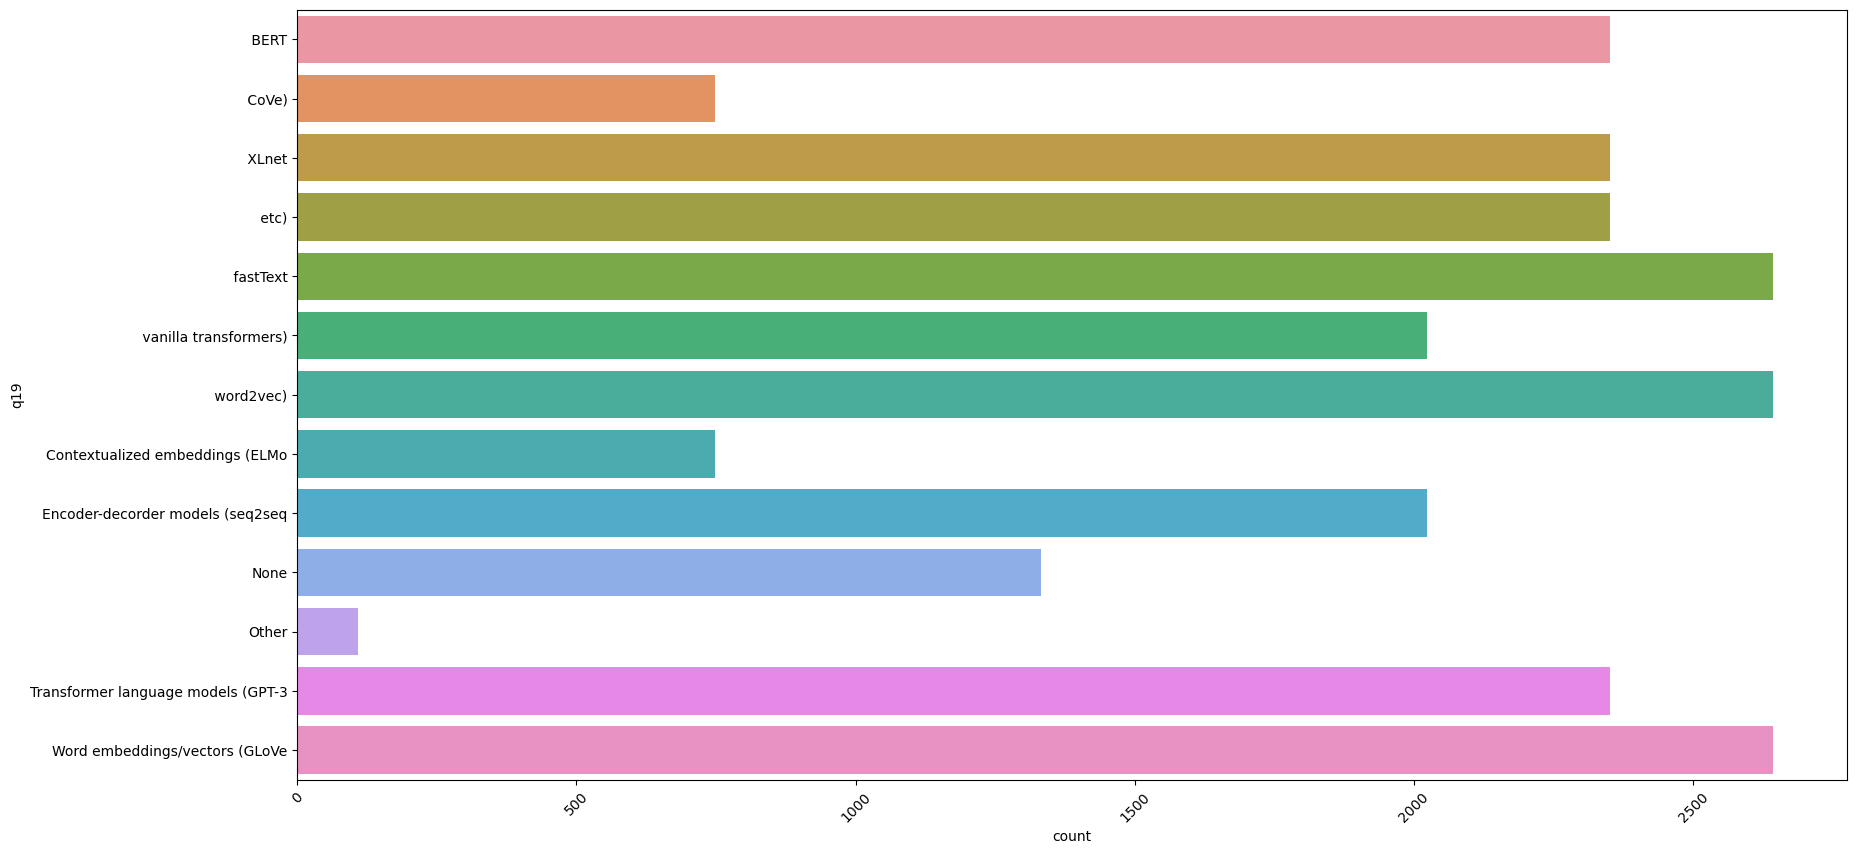

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q19', data = df_q19)
plt.xticks(rotation = 45);

In [ ]:
#q27

df_q27 = df['q27'].reset_index()
df_q27

,index,q27
0,0,"Google Cloud Platform (GCP) ,"
1,1,NaN
2,2,"None,"
3,3,NaN
4,4,"Microsoft Azure ,"
...,...,...
25968,25968,"Amazon Web Services (AWS) , Microsoft Azure ,"
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [ ]:
df_q27['q27'] = df_q27['q27'].apply(quitar_comillas)

In [ ]:
df_27_explode = df_q27['q27'].explode().reset_index()

In [ ]:
df_27_explode

,index,q27
0,0,Google Cloud Platform (GCP)
1,0,
2,1,None
3,2,None
4,2,
...,...,...
40382,25968,
40383,25969,None
40384,25970,None
40385,25971,None


In [ ]:
df_27_explode['q27'].unique()

array([' Google Cloud Platform (GCP) ', '', None, 'None',
       ' Microsoft Azure ', ' Oracle Cloud ',
       ' Amazon Web Services (AWS) ', ' IBM Cloud / Red Hat ',
       ' SAP Cloud ', ' Tencent Cloud ', ' Alibaba Cloud ',
       ' VMware Cloud ', ' Salesforce Cloud ', 'Other'], dtype=object)

In [ ]:
gb_27 = df_27_explode.groupby('q27').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [ ]:
df_q27 = gb_27.reset_index(name = 'count')

In [ ]:
df_q27.drop(0, axis = 0,inplace = True)

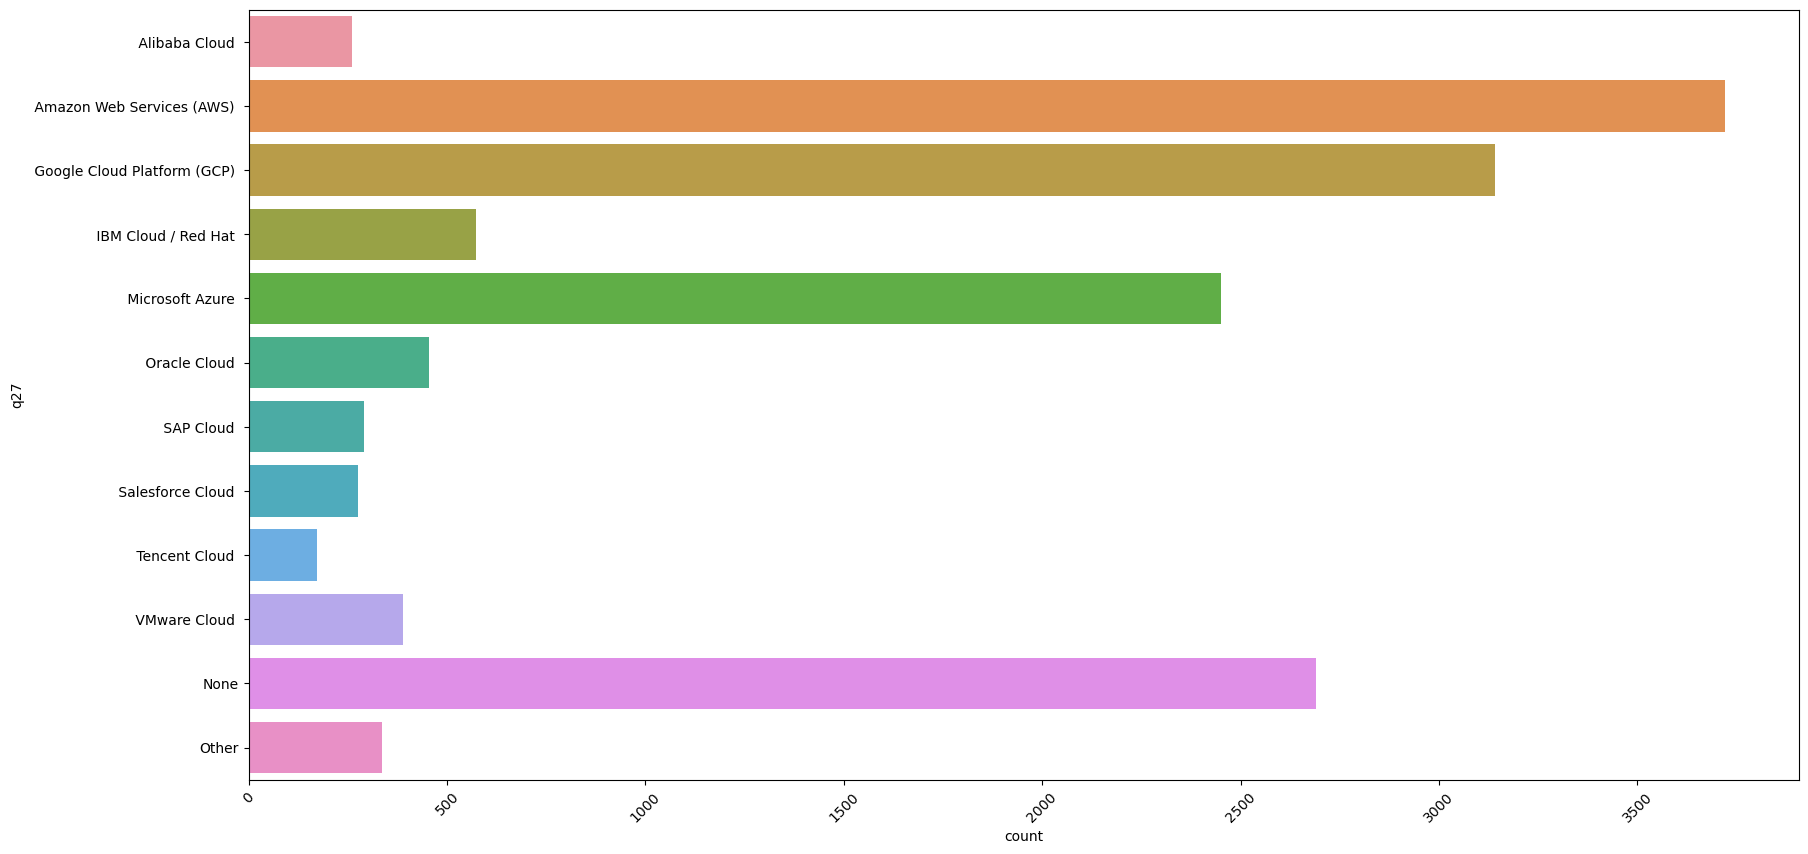

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q27', data = df_q27)
plt.xticks(rotation = 45);

# Q29

In [ ]:
df_q29=df['q29'].reset_index()
df_q29

,index,q29
0,0,"Google Cloud Compute Engine ,"
1,1,NaN
2,2,NaN
3,3,NaN
4,4,"Microsoft Azure Virtual Machines ,"
...,...,...
25968,25968,"Amazon Elastic Compute Cloud (EC2) , Microsof..."
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [ ]:
df_q29['q29'] = df_q29['q29'].apply(quitar_comillas)
df_q29

,index,q29
0,0,"[ Google Cloud Compute Engine , ]"
1,1,None
2,2,None
3,3,None
4,4,"[ Microsoft Azure Virtual Machines , ]"
...,...,...
25968,25968,"[ Amazon Elastic Compute Cloud (EC2) , Micros..."
25969,25969,None
25970,25970,None
25971,25971,None


In [ ]:
df_29_explode = df_q29['q29'].explode().reset_index()
df_29_explode


,index,q29
0,0,Google Cloud Compute Engine
1,0,
2,1,None
3,2,None
4,3,None
...,...,...
33496,25968,
33497,25969,None
33498,25970,None
33499,25971,None


In [ ]:
df_29_gp = df_29_explode.groupby('q29').size()
df_29_gp

q29
                                        6136
 Amazon Elastic Compute Cloud (EC2)     2270
 Google Cloud Compute Engine            1960
 Microsoft Azure Virtual Machines       1503
No / None                               1795
Other                                     98
dtype: int64

In [ ]:
df_29_gp = df_29_gp.reset_index(name='count')
df_29_gp

,q29,count
0,,6136
1,Amazon Elastic Compute Cloud (EC2),2270
2,Google Cloud Compute Engine,1960
3,Microsoft Azure Virtual Machines,1503
4,No / None,1795
5,Other,98


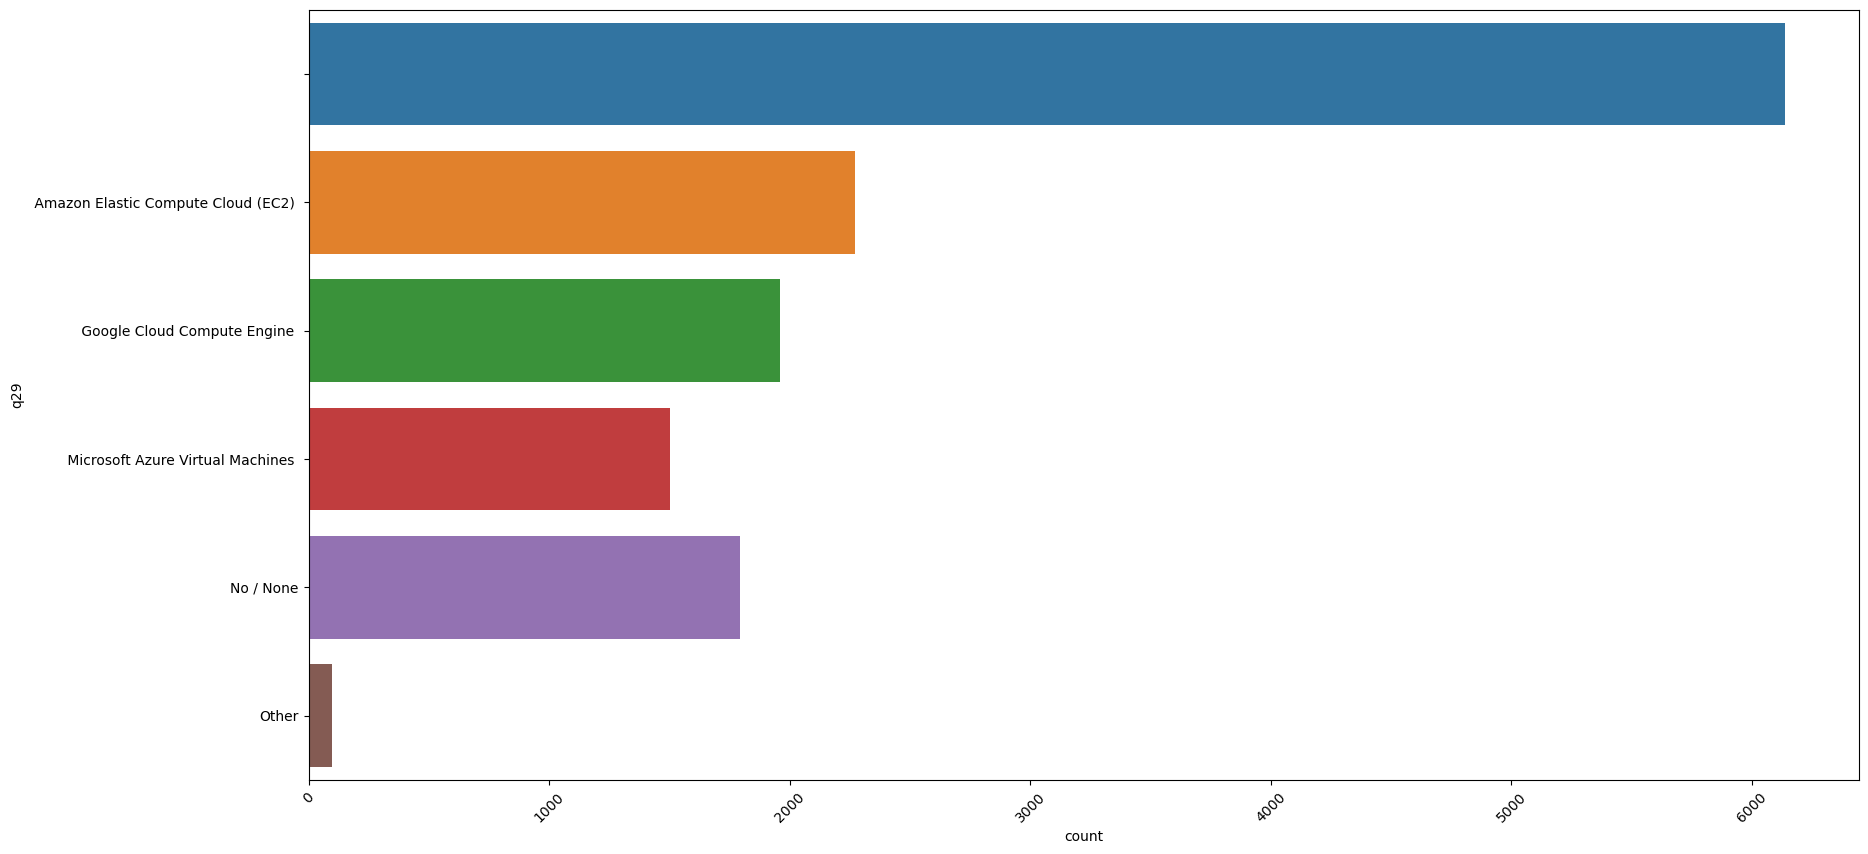

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q29', data=df_29_gp)
plt.xticks(rotation = 45);

# Q30

In [ ]:
df_q30=df['q30'].reset_index()
df_q30

,index,q30
0,0,"Google Cloud Storage (GCS) ,"
1,1,NaN
2,2,NaN
3,3,NaN
4,4,"Microsoft Azure Data Lake Storage ,"
...,...,...
25968,25968,"Amazon Simple Storage Service (S3) , Amazon ..."
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [ ]:
df_q30['q30'] = df_q30['q30'].apply(quitar_comillas)
df_q30

,index,q30
0,0,"[Google Cloud Storage (GCS) , ]"
1,1,None
2,2,None
3,3,None
4,4,"[Microsoft Azure Data Lake Storage , ]"
...,...,...
25968,25968,"[ Amazon Simple Storage Service (S3) , Amazo..."
25969,25969,None
25970,25970,None
25971,25971,None


In [ ]:
df_30_explode = df_q30['q30'].explode().reset_index()
df_30_explode

,index,q30
0,0,Google Cloud Storage (GCS)
1,0,
2,1,None
3,2,None
4,3,None
...,...,...
34942,25968,
34943,25969,None
34944,25970,None
34945,25971,None


In [ ]:
df_30_gp = df_30_explode.groupby('q30').size()
df_30_gp

q30
                                         6097
 Amazon Elastic File System (EFS)         685
 Amazon Simple Storage Service (S3)      2308
 Google Cloud Filestore                   772
Google Cloud Storage (GCS)               1950
Microsoft Azure Data Lake Storage         908
Microsoft Azure Disk Storage              841
No / None                                1510
Other                                      92
dtype: int64

In [ ]:
df_30_gp= df_30_gp.reset_index(name='count')
df_30_gp

,q30,count
0,,6097
1,Amazon Elastic File System (EFS),685
2,Amazon Simple Storage Service (S3),2308
3,Google Cloud Filestore,772
4,Google Cloud Storage (GCS),1950
5,Microsoft Azure Data Lake Storage,908
6,Microsoft Azure Disk Storage,841
7,No / None,1510
8,Other,92


In [ ]:
df_30_gp.drop(0, axis= 0,inplace=True)

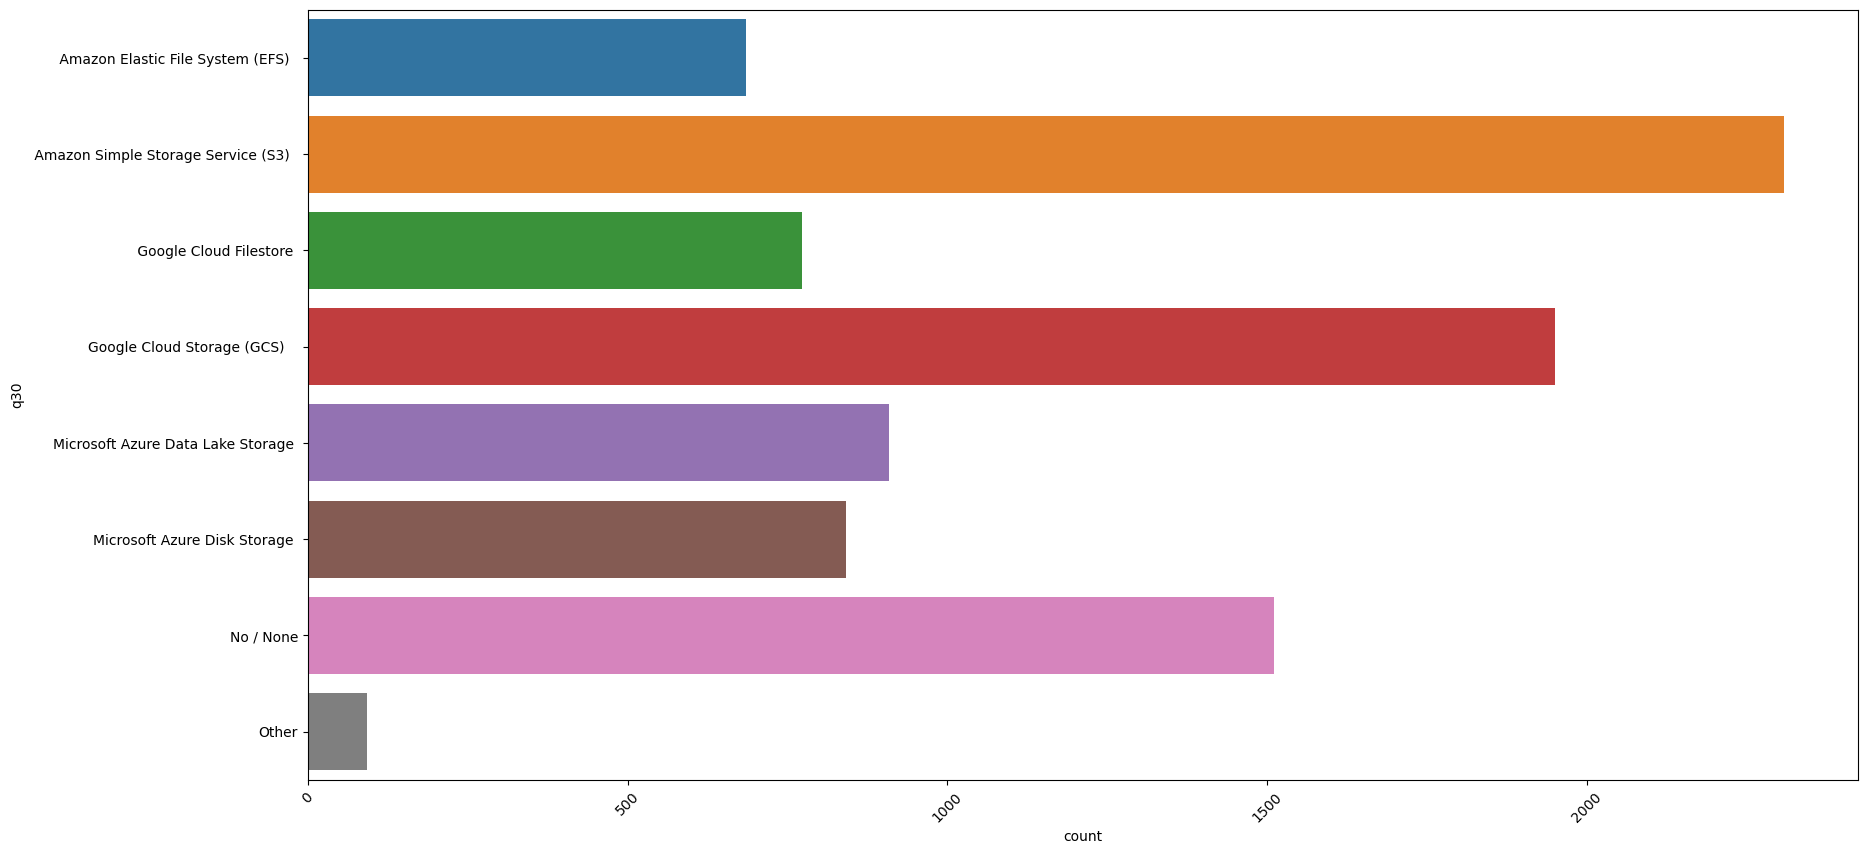

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q30', data=df_30_gp)
plt.xticks(rotation = 45);

# Q31

In [ ]:
df_q31=df['q31'].reset_index()
df_q31

,index,q31
0,0,"No / None,"
1,1,NaN
2,2,"DataRobot,"
3,3,NaN
4,4,"Azure Machine Learning Studio ,"
...,...,...
25968,25968,"Amazon SageMaker , Databricks,"
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [ ]:
df_q31['q31'] = df_q31['q31'].apply(quitar_comillas)
df_q31

,index,q31
0,0,"[No / None, ]"
1,1,None
2,2,"[ DataRobot, ]"
3,3,None
4,4,"[ Azure Machine Learning Studio , ]"
...,...,...
25968,25968,"[ Amazon SageMaker , Databricks, ]"
25969,25969,None
25970,25970,None
25971,25971,None


In [ ]:
df_31_explode = df_q31['q31'].explode().reset_index()
df_31_explode

,index,q31
0,0,No / None
1,0,
2,1,None
3,2,DataRobot
4,2,
...,...,...
36906,25968,
36907,25969,None
36908,25970,None
36909,25971,None


In [ ]:
df_31_gp = df_31_explode.groupby('q31').size()
df_31_gp

q31
                                   9297
 Alteryx                            254
 Amazon SageMaker                   991
 Azure Machine Learning Studio      945
 DataRobot                          332
 Databricks                         825
 Dataiku                            203
 Google Cloud Vertex AI             714
 Rapidminer                         293
No / None                          6381
Other                               275
dtype: int64

In [ ]:
df_31_gp= df_31_gp.reset_index(name='count')
df_31_gp.drop(0, axis= 0,inplace=True)
df_31_gp

,q31,count
1,Alteryx,254
2,Amazon SageMaker,991
3,Azure Machine Learning Studio,945
4,DataRobot,332
5,Databricks,825
6,Dataiku,203
7,Google Cloud Vertex AI,714
8,Rapidminer,293
9,No / None,6381
10,Other,275


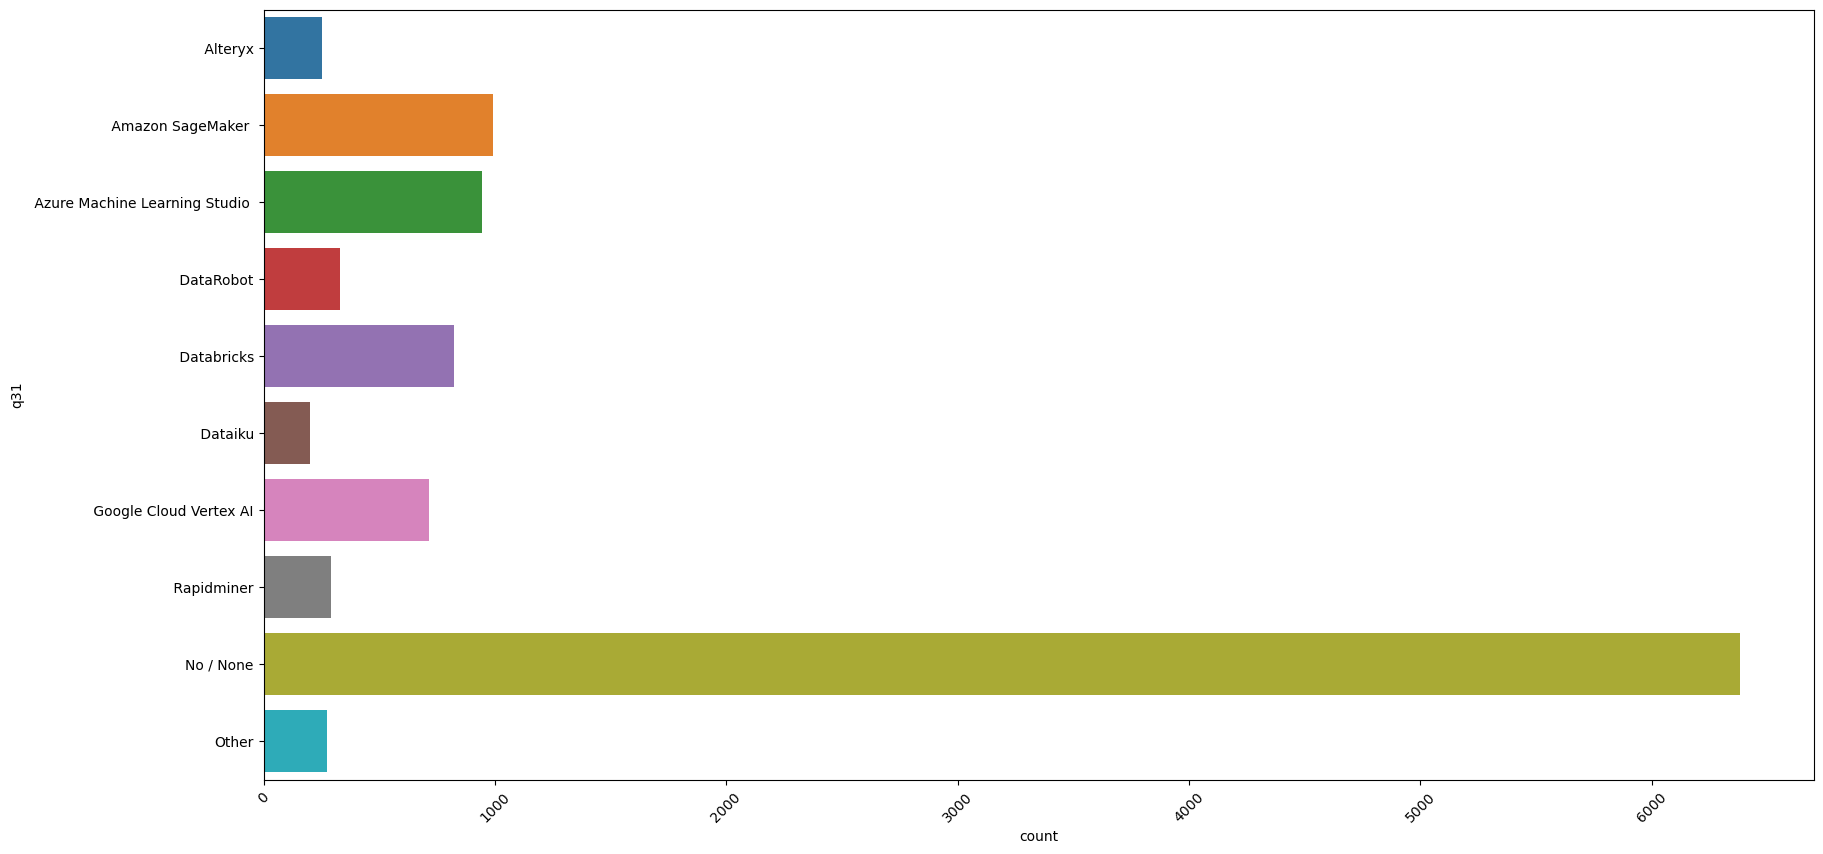

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q31', data=df_31_gp)
plt.xticks(rotation = 45);

# q33
    Which of the following big data products (relational database, data warehouse, data lake, or similar)
do you use most often?
    Question 33 (which specific product) was only asked to respondents that selected more than one choice
for Question 32-A (which of the following products)

In [ ]:
df_q33=df['q33'].reset_index()
df_q33

,index,q33
0,0,NaN
1,1,NaN
2,2,MySQL
3,3,NaN
4,4,NaN
...,...,...
25968,25968,MongoDB
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [ ]:
df_q33['q33'] = df_q33['q33'].apply(quitar_comillas)

In [ ]:
df_q33_explode = df_q33['q33'].explode().reset_index()

In [ ]:
gb_q33 = df_q33_explode.groupby('q33').size()

In [ ]:
df_q33 = gb_q33.reset_index(name='count')

In [ ]:
df_q33.head()

,q33,count
0,Amazon Aurora,34
1,Amazon DynamoDB,77
2,Amazon RDS,94
3,Amazon Redshift,146
4,Google Cloud BigQuery,298


In [ ]:
df_q33.drop(0, axis= 0,inplace=True)

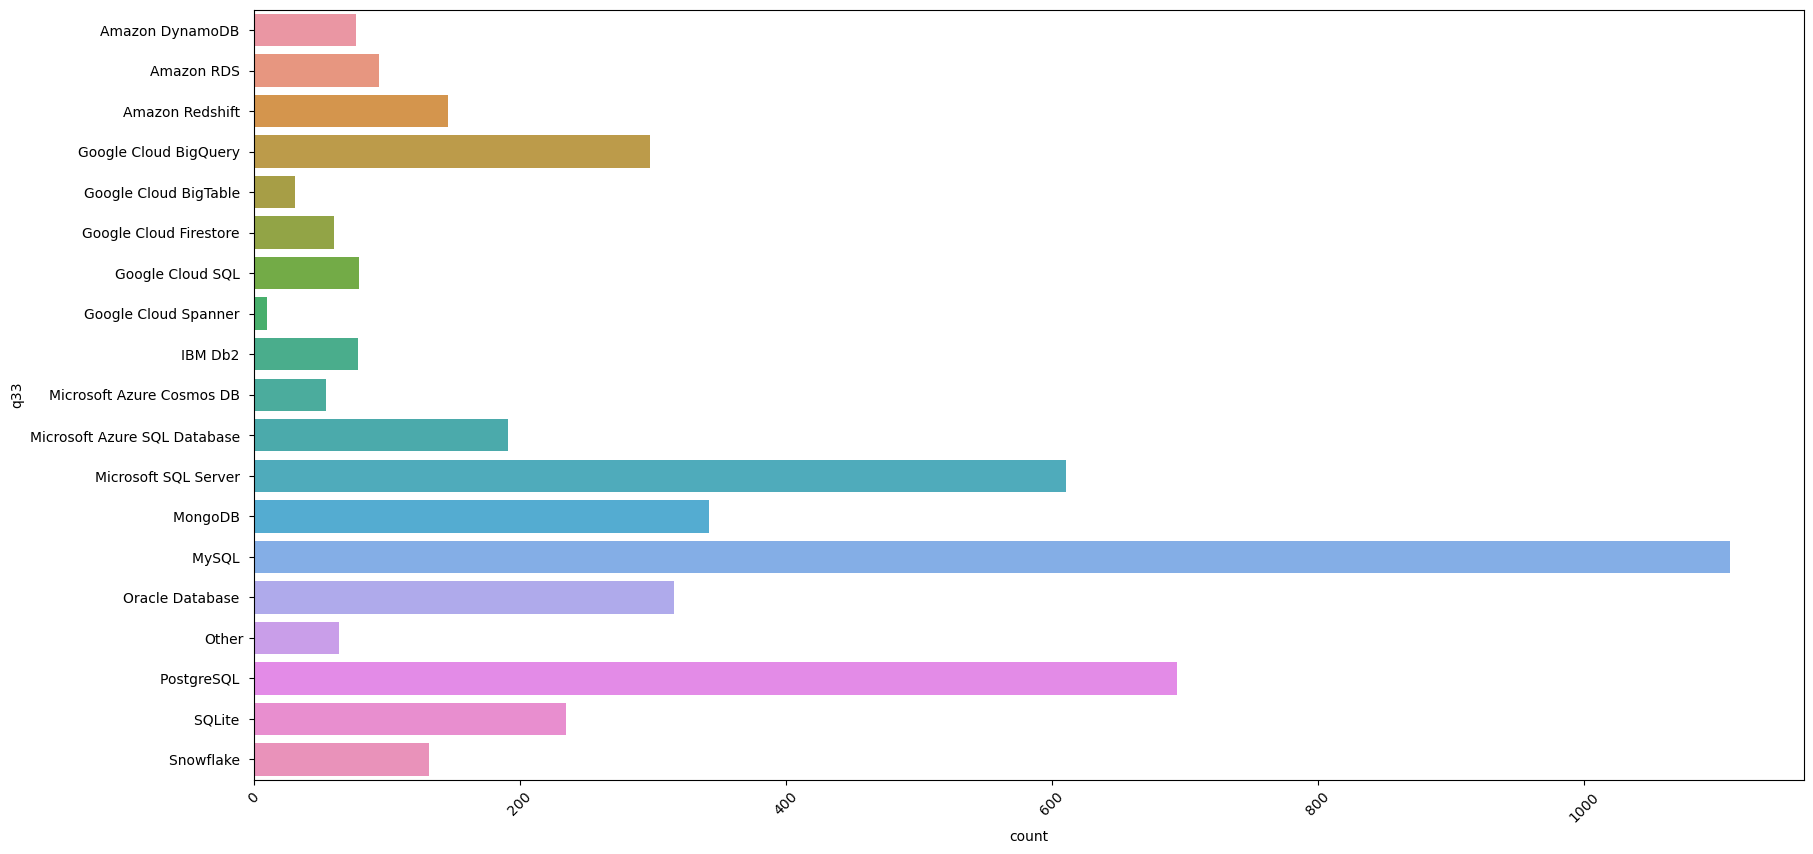

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q33', data=df_q33)
plt.xticks(rotation = 45);

# q36
- Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?

In [ ]:
df_q36=df['q36'].reset_index()
df_q36

,index,q36
0,0,"No / None,"
1,1,NaN
2,2,"No / None,"
3,3,NaN
4,4,"No / None,"
...,...,...
25968,25968,"No / None,"
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [ ]:
df_q36['q36'] = df_q36['q36'].apply(quitar_comillas)

In [ ]:
df_q36_explode = df_q36['q36'].explode().reset_index()

In [ ]:
gb_q36 = df_q36_explode.groupby('q36').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [ ]:
df_q36 = gb_q36.reset_index(name='count')

In [ ]:
df_q36.head()

,q36,count
0,,9101
1,H2O Driverless AI),893
2,Vizier),952
3,albumentations),1009
4,boruta_py),781


In [ ]:
df_q36.drop(0, axis= 0,inplace=True)

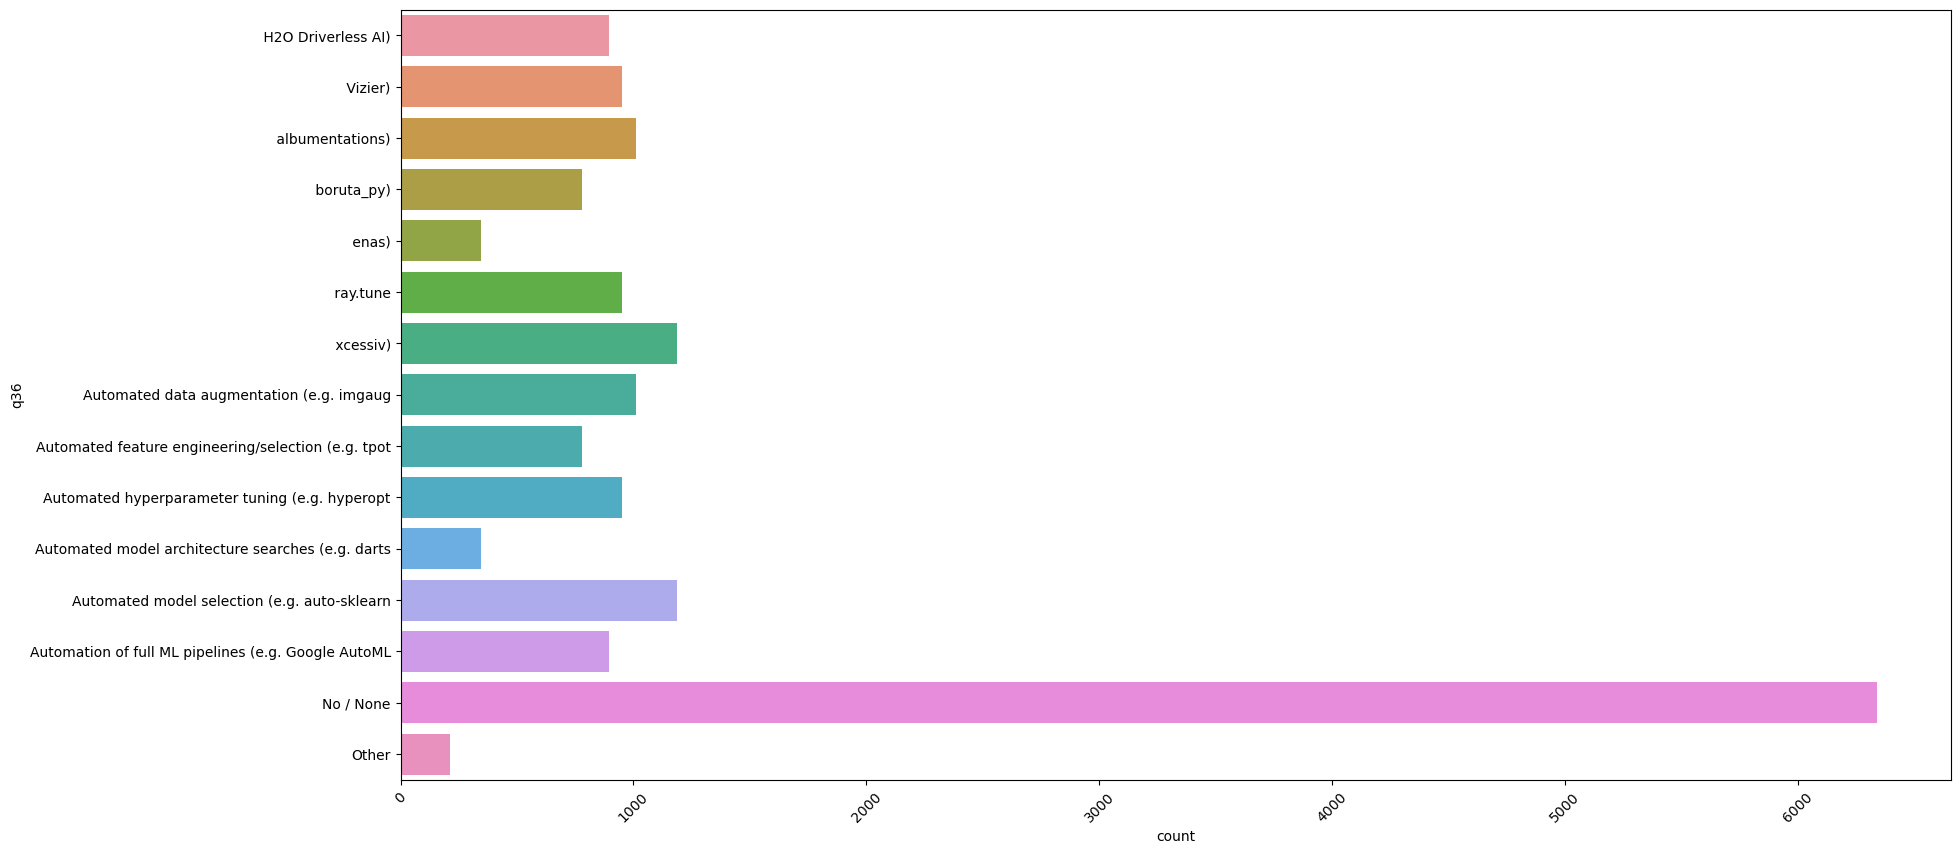

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q36', data=df_q36)
plt.xticks(rotation = 45);

# q37
- Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply).

- Question 37-A (which specific product) was only asked to respondents that answered affirmatively to  Question 36-A (which of the following categories of products)

In [ ]:
df_q37=df['q37'].reset_index()
df_q37

,index,q37
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
25968,25968,NaN
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [ ]:
df_q37['q37'] = df_q37['q37'].apply(quitar_comillas)

In [ ]:
df_q37_explode = df_q37['q37'].explode().reset_index()

In [ ]:
gb_q37 = df_q37_explode.groupby('q37').size()

In [ ]:
df_q37 = gb_q37.reset_index(name='count')

In [ ]:
df_q37.head()

,q37,count
0,,2734
1,Amazon Sagemaker Autopilot,377
2,Azure Automated Machine Learning,449
3,DataRobot AutoML,271
4,Databricks AutoML,321


In [ ]:
df_q37.drop(0, axis= 0,inplace=True)

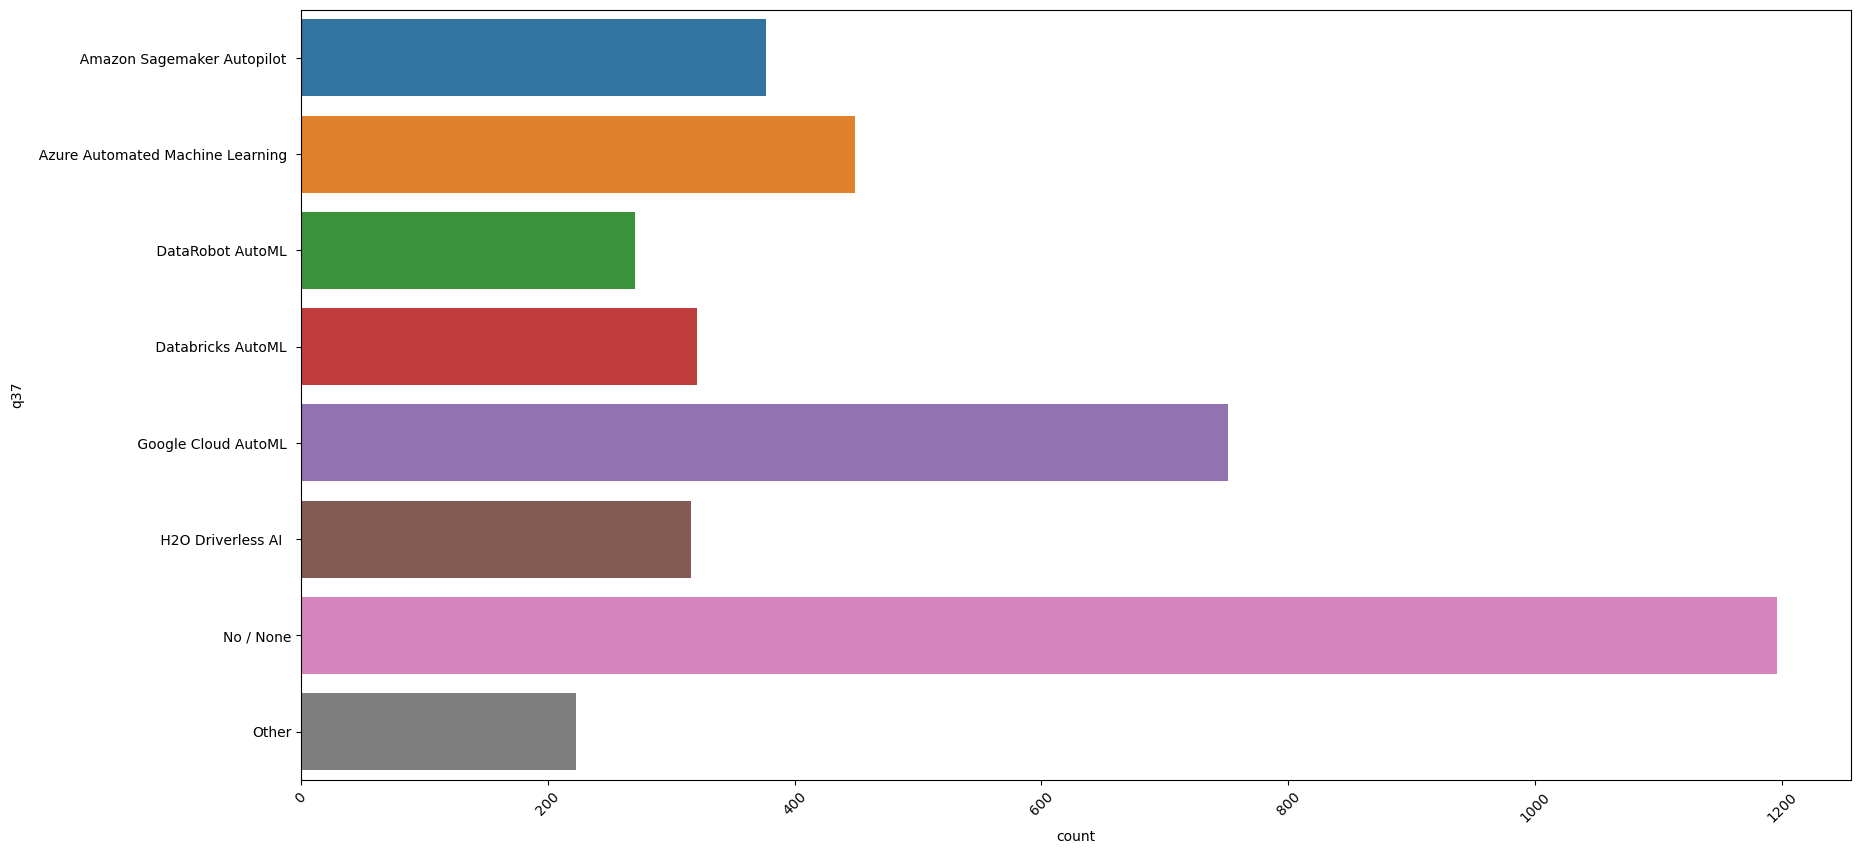

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q37', data=df_q37)
plt.xticks(rotation = 45);

# q38
- Do you use any tools to help manage machine learning experiments? (Select all that apply)

In [ ]:
df_q38=df['q38'].reset_index()
df_q38

,index,q38
0,0,"No / None,"
1,1,NaN
2,2,"No / None,"
3,3,NaN
4,4,"Weights & Biases ,"
...,...,...
25968,25968,"TensorBoard ,"
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [ ]:
df_q38['q38'] = df_q38['q38'].apply(quitar_comillas)

In [ ]:
df_q38_explode = df_q38['q38'].explode().reset_index()

In [ ]:
gb_q38 = df_q38_explode.groupby('q38').size()

In [ ]:
df_q38 = gb_q38.reset_index(name='count')

In [ ]:
df_q38.head()

,q38,count
0,,9012
1,ClearML,177
2,Comet.ml,106
3,Domino Model Monitor,91
4,Guild.ai,119


In [ ]:
df_q38.drop(0, axis= 0,inplace=True)

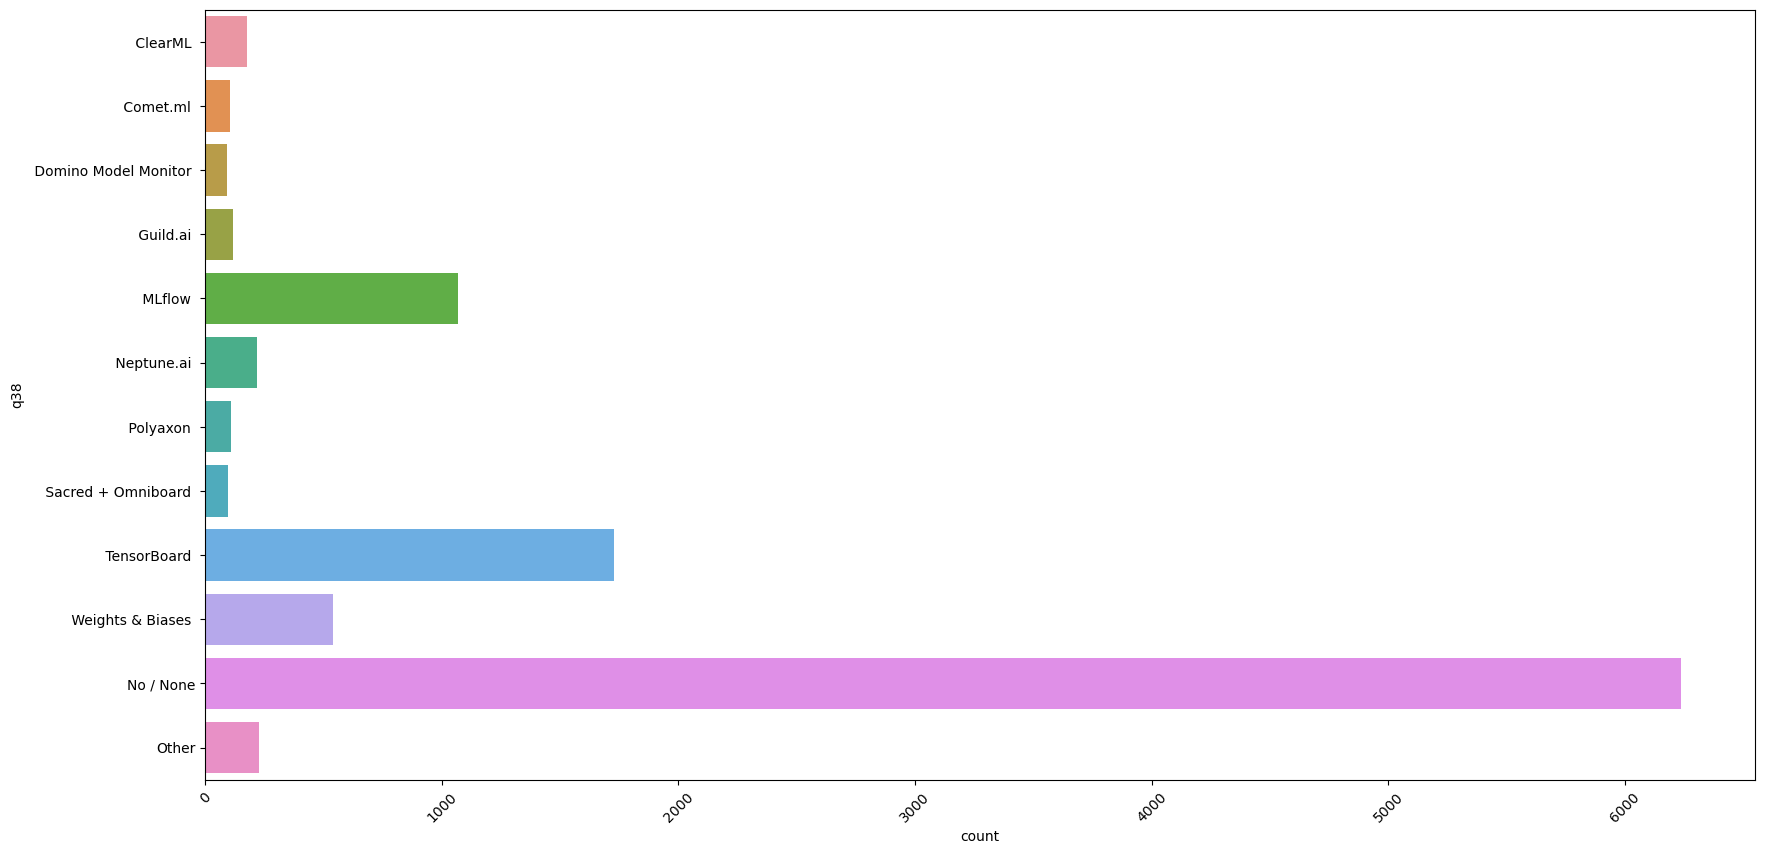

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q38', data=df_q38)
plt.xticks(rotation = 45);

# q39

In [ ]:
df_q39=df['q39'].reset_index()
df_q39

,index,q39
0,0,"GitHub , Kaggle ,"
1,1,NaN
2,2,"I do not share my work publicly,"
3,3,NaN
4,4,"I do not share my work publicly,"
...,...,...
25968,25968,"GitHub , Colab ,"
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [ ]:
df_q39['q39'] = df_q39['q39'].apply(quitar_comillas)

In [ ]:
df_39_explode = df_q39['q39'].explode().reset_index()

In [ ]:
df_39_explode

,index,q39
0,0,GitHub
1,0,Kaggle
2,0,
3,1,None
4,2,I do not share my work publicly
...,...,...
40460,25968,
40461,25969,None
40462,25970,None
40463,25971,None


In [ ]:
df_39_explode['q39'].unique()

array([' GitHub ', ' Kaggle ', '', None,
       'I do not share my work publicly', ' Plotly Dash ', ' Colab ',
       'Other', ' Streamlit ', ' Personal blog ', ' NBViewer ', ' Shiny '],
      dtype=object)

In [ ]:
gb39 = df_39_explode.groupby('q39').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [ ]:
df_q39 = gb39.reset_index(name='count')

In [ ]:
df_q39

,q39,count
0,,8905
1,Colab,1848
2,GitHub,4586
3,Kaggle,3065
4,NBViewer,136
5,Personal blog,705
6,Plotly Dash,293
7,Shiny,305
8,Streamlit,387
9,I do not share my work publicly,3167


In [ ]:
df_q39.drop(0, axis= 0,inplace=True)

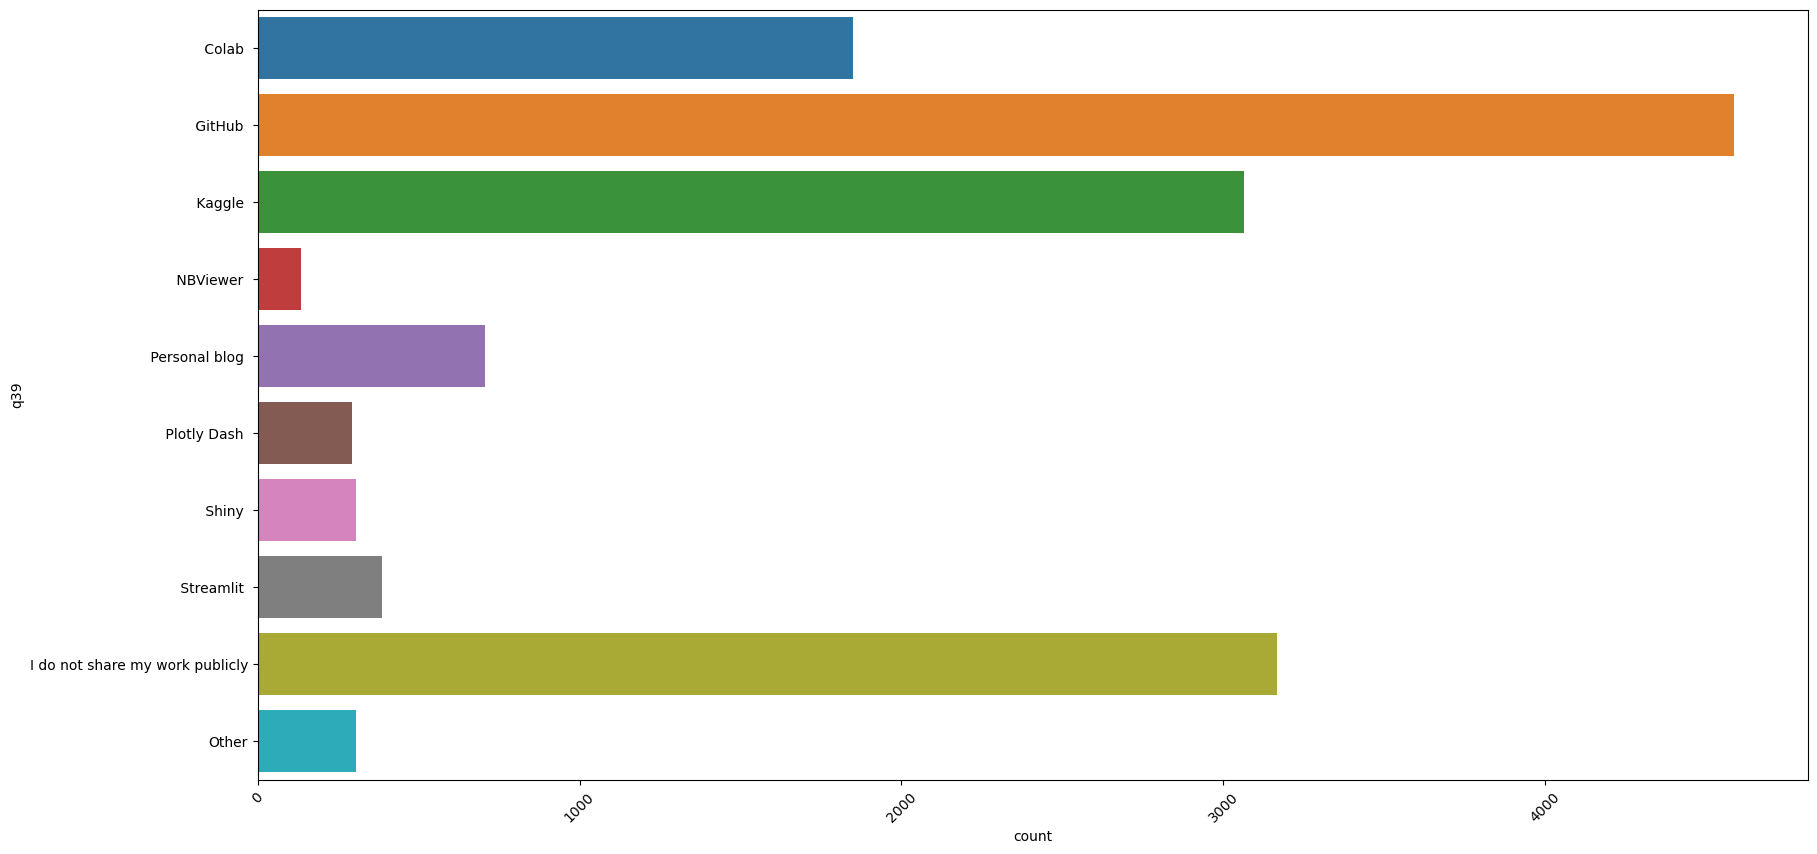

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q39', data=df_q39)
plt.xticks(rotation = 45);

# q40

In [ ]:
df_q40=df['q40'].reset_index()
df_q40

,index,q40
0,0,"Coursera,edX,Kaggle Learn Courses,DataCamp,Uda..."
1,1,"Kaggle Learn Courses,Cloud-certification progr..."
2,2,"DataCamp,"
3,3,"Coursera,edX,"
4,4,"Kaggle Learn Courses,Udemy,"
...,...,...
25968,25968,"Coursera,Kaggle Learn Courses,DataCamp,Udacity..."
25969,25969,NaN
25970,25970,"Coursera,LinkedIn Learning,"
25971,25971,NaN


In [ ]:
df_q40['q40'] = df_q40['q40'].apply(quitar_comillas)

In [ ]:
df_40_explode = df_q40['q40'].explode().reset_index()

In [ ]:
df_40_explode

,index,q40
0,0,Coursera
1,0,edX
2,0,Kaggle Learn Courses
3,0,DataCamp
4,0,Udacity
...,...,...
78264,25970,LinkedIn Learning
78265,25970,
78266,25971,None
78267,25972,None


In [ ]:
df_40_explode['q40'].unique()

array(['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Udacity',
       'Udemy', '', 'Cloud-certification programs (direct from AWS',
       ' Azure', ' GCP', ' or similar)',
       'University Courses (resulting in a university degree)', None,
       'LinkedIn Learning', 'None', 'Other', 'Fast.ai'], dtype=object)

In [ ]:
gb40 = df_40_explode.groupby('q40').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [ ]:
df_q40 = gb40.reset_index(name='count')

In [ ]:
df_q40

,q40,count
0,,17128
1,Azure,1804
2,GCP,1804
3,or similar),1804
4,Cloud-certification programs (direct from AWS,1804
5,Coursera,9649
6,DataCamp,3996
7,Fast.ai,1157
8,Kaggle Learn Courses,8670
9,LinkedIn Learning,2693


In [ ]:
df_q40.drop(0, axis= 0,inplace=True)

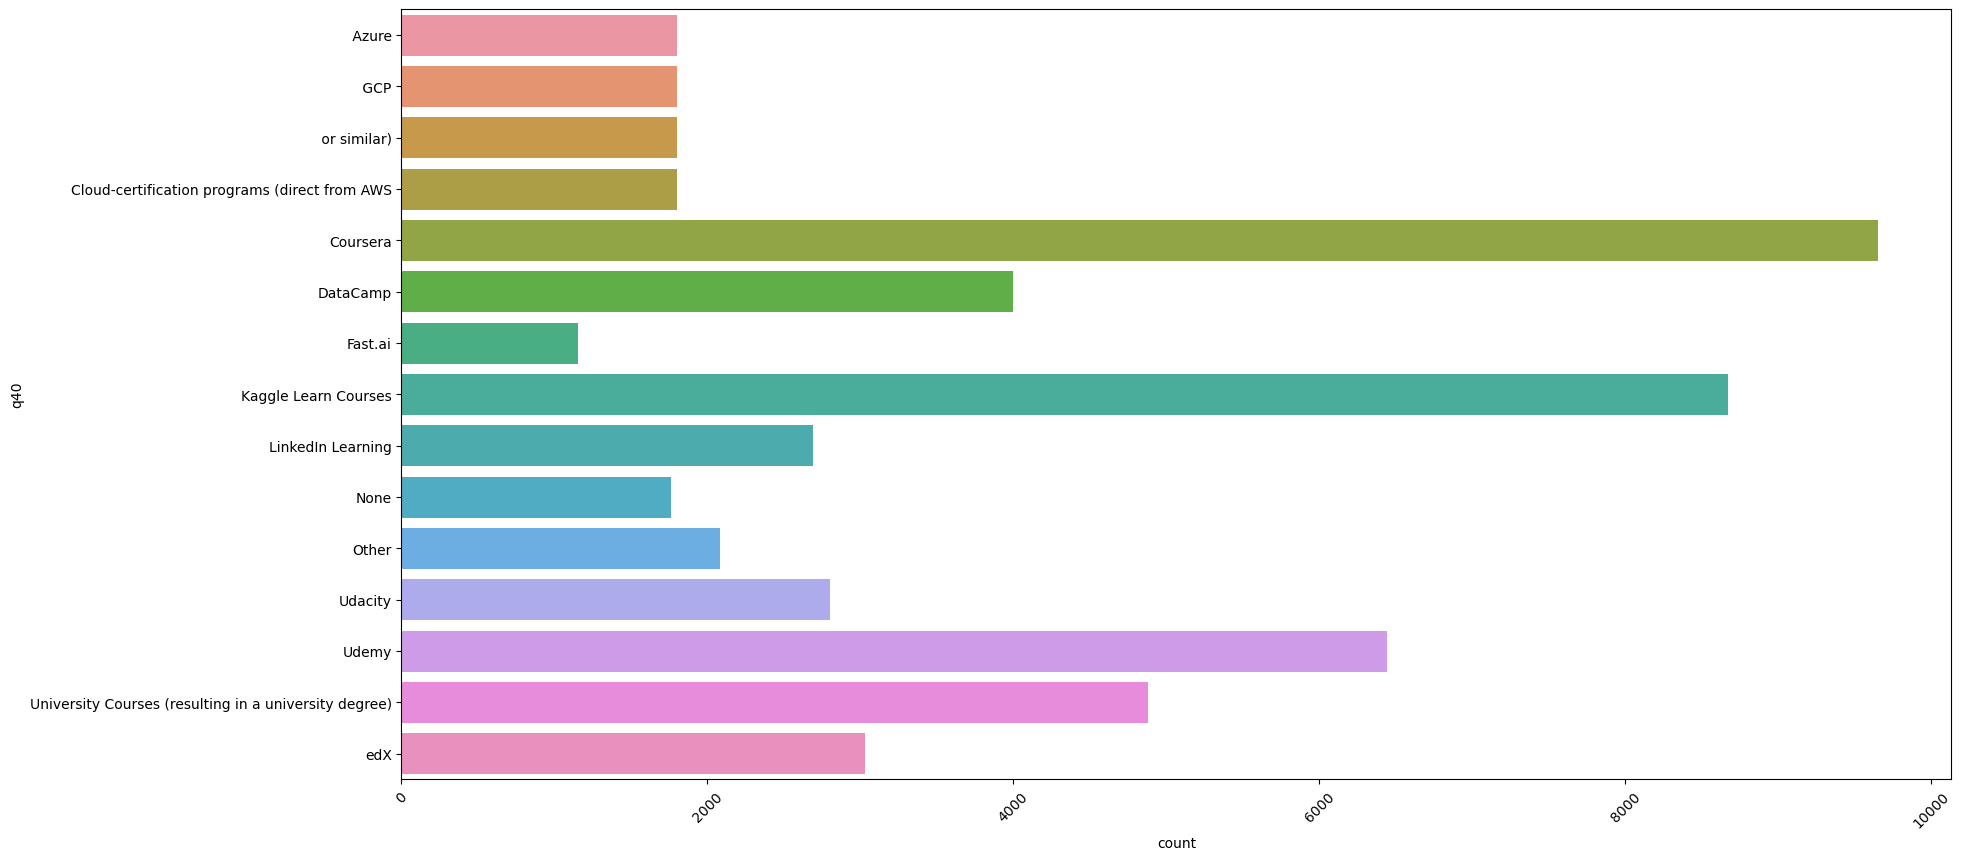

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q40', data=df_q40)
plt.xticks(rotation = 45);

# q42

In [ ]:
df_q42=df['q42'].reset_index()
df_q42

,index,q42
0,0,"Email newsletters (Data Elixir, O'Reilly Data ..."
1,1,"Journal Publications (peer-reviewed journals, ..."
2,2,"Kaggle (notebooks, forums, etc),YouTube (Kaggl..."
3,3,"YouTube (Kaggle YouTube, Cloud AI Adventures, ..."
4,4,"Journal Publications (peer-reviewed journals, ..."
...,...,...
25968,25968,"Kaggle (notebooks, forums, etc),YouTube (Kaggl..."
25969,25969,NaN
25970,25970,"None,"
25971,25971,NaN


In [ ]:
df_q42['q42'] = df_q42['q42'].apply(quitar_comillas)

In [ ]:
df_42_explode = df_q42['q42'].explode().reset_index()

In [ ]:
df_42_explode

,index,q42
0,0,Email newsletters (Data Elixir
1,0,O'Reilly Data & AI
2,0,etc)
3,0,Kaggle (notebooks
4,0,forums
...,...,...
167265,25970,None
167266,25970,
167267,25971,None
167268,25972,None


In [ ]:
df_42_explode['q42'].unique()

array(['Email newsletters (Data Elixir', " O'Reilly Data & AI", ' etc)',
       'Kaggle (notebooks', ' forums', 'YouTube (Kaggle YouTube',
       ' Cloud AI Adventures', 'Podcasts (Chai Time Data Science',
       ' O’Reilly Data Show', 'Blogs (Towards Data Science',
       ' Analytics Vidhya',
       'Journal Publications (peer-reviewed journals',
       ' conference proceedings', '', 'Course Forums (forums.fast.ai',
       ' Coursera forums', None, 'Slack Communities (ods.ai',
       ' kagglenoobs', 'Twitter (data science influencers)',
       'Reddit (r/machinelearning', 'Other', 'None'], dtype=object)

In [ ]:
gb42 = df_42_explode.groupby('q42').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [ ]:
df_q42 = gb42.reset_index(name='count')

In [ ]:
df_q42

,q42,count
0,,17746
1,Analytics Vidhya,7977
2,Cloud AI Adventures,10401
3,Coursera forums,2996
4,O'Reilly Data & AI,3441
5,O’Reilly Data Show,2022
6,conference proceedings,3350
7,etc),46494
8,forums,11373
9,kagglenoobs,1995


In [ ]:
df_q42.drop(0, axis= 0,inplace=True)

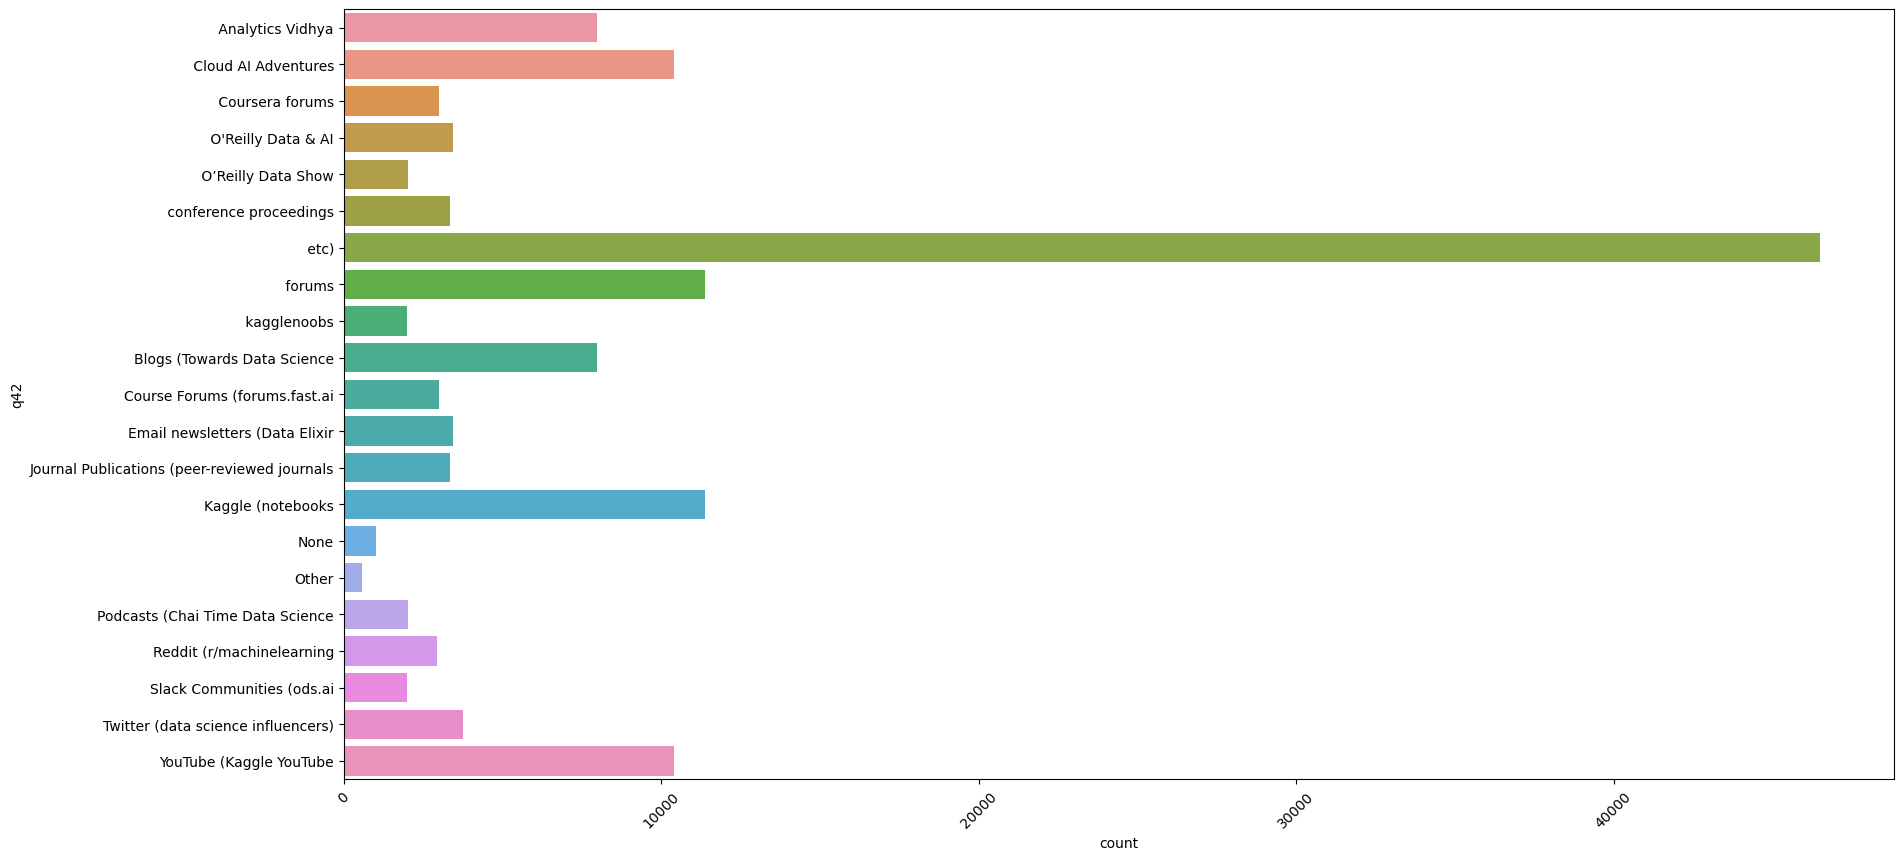

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q42', data=df_q42)
plt.xticks(rotation = 45);